    BMI  AGE  SUGAR
0  33.6   50      1
1  26.6   30      0
2  23.4   40      0
3  43.1   67      0
4  35.3   23      1
5  35.9   67      1
6  36.7   45      1
7  25.7   46      0
8  23.3   29      0
9  31.0   56      1


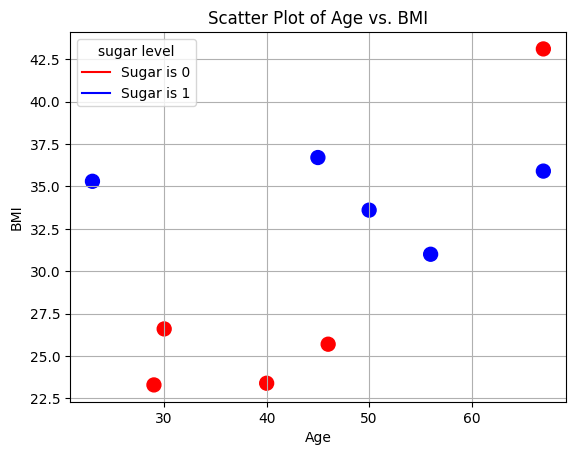

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Prediction: [1]
The person have Sugar
Confusion Matrix:
 [[2 0]
 [0 1]]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#dataset
data={'BMI':[33.6,26.6,23.4,43.1,35.3,35.9,36.7,25.7,23.3,31],
      'AGE':[50,30,40,67,23,67,45,46,29,56],
      'SUGAR':[1,0,0,0,1,1,1,0,0,1]}

#dataframe
df=pd.DataFrame(data)

#save to csv
df.to_csv('bookstore.csv')
print(df)

#scatter plot
plt.scatter(df['AGE'], df['BMI'], c=df['SUGAR'].map({0:'red',1:'blue'}), s=100)
plt.plot([],color='red',label='Sugar is 0')
plt.plot([],color='blue',label='Sugar is 1')
plt.legend(title='sugar level')
plt.title('Scatter Plot of Age vs. BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

#data preprocessing
X = df[['BMI', 'AGE']]
y = df['SUGAR']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#feature scaling
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#implementing KNN
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

#making predictions
y_pred = knn.predict(X_test)

#classification of the data
new_data=[[43.6,40]]

#new data scaling
scaler = StandardScaler().fit(new_data)
new_data = scaler.transform(new_data)

#newdata prediction
pred = knn.predict(new_data)

#evaluate the model and display results
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred))
print("Prediction:",pred)
if pred[0]==0:
  print("The person have no Sugar")
else:
  print("The person have Sugar")
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))